In [7]:
import glob as glob
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

In [2]:
%matplotlib ipympl

In [75]:
# insert subject name here:
subject_name="*"
graph_data_files = glob.glob('temp_data/no_leading_misses/'+subject_name+'*OFDvEcc.*')

In [4]:
# # use only for 3 tuples
# fig, ax = plt.subplots()

# for filename in graph_data_files:
#     # laod the data, and add to plot
#     with open(filename, 'rb') as f:
#         graph_data_tuples = pkl.load(f)
#     for i in range(int(len(graph_data_tuples)/3)):
#         OFD = graph_data_tuples[3*i]
#         eccentricity = graph_data_tuples[3*i+1]
#         response = graph_data_tuples[3*i+2]
#         ax.scatter(OFD, eccentricity, c='r' if response else 'g')

# ax.set_ylim(-1, 80)
# ax.set_xlim(-0.05, 4)
# ax.set_xlabel("Onset Fixation Duration (seconds)")
# ax.set_ylabel("Eccentricity (degrees)")

# ax.set_title("Hits/Misses on Gaze Eccentricity vs. OFD")

350 283 67


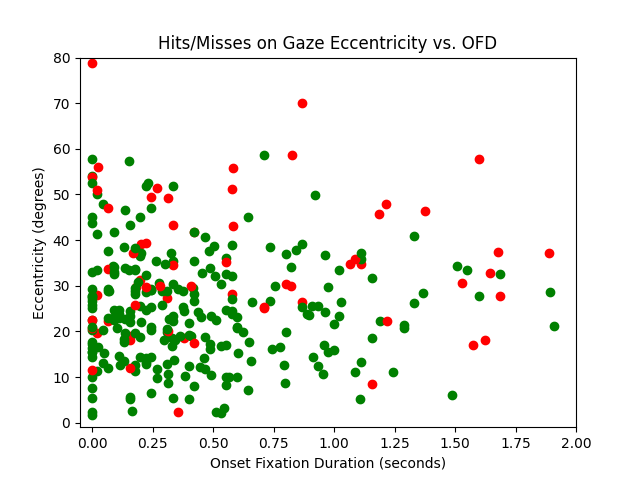

In [76]:
## use for 5 tuples
fig, ax = plt.subplots()

total_targets = 0
hits = 0
misses = 0

for filename in graph_data_files:
    # laod the data, and add to plot
    with open(filename, 'rb') as f:
        graph_data_tuples = pkl.load(f)
    num_entries = 5
    for i in range(int(len(graph_data_tuples)/num_entries)):
        OFD = graph_data_tuples[num_entries*i]
        eccentricity = graph_data_tuples[num_entries*i+1]
        response = graph_data_tuples[num_entries*i+2]
        pitch = graph_data_tuples[num_entries*i+3]
        yaw = graph_data_tuples[num_entries*i+4]
        ax.scatter(OFD, eccentricity, c='r' if response else 'g')
        total_targets +=1
        if response:
            misses += 1
        else:
            hits += 1

ax.set_ylim(-1, 80)
ax.set_xlim(-0.05, 2)
ax.set_xlabel("Onset Fixation Duration (seconds)")
ax.set_ylabel("Eccentricity (degrees)")

ax.set_title("Hits/Misses on Gaze Eccentricity vs. OFD")
print( total_targets, hits, misses)

376 283 93


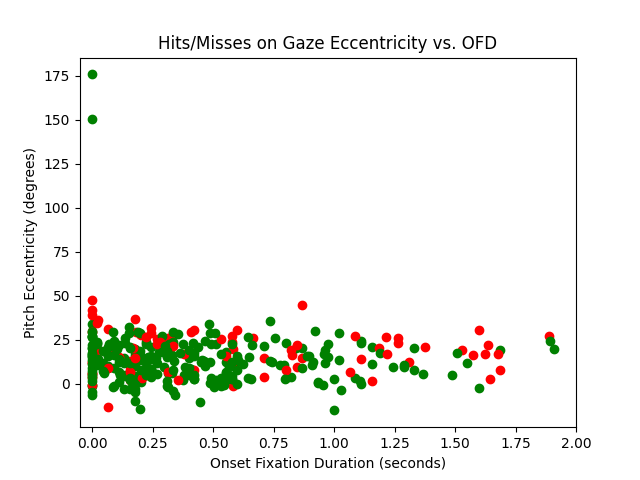

In [73]:
fig, ax = plt.subplots()

total_targets = 0
hits = 0
misses = 0

for filename in graph_data_files:
    # laod the data, and add to plot
    with open(filename, 'rb') as f:
        graph_data_tuples = pkl.load(f)
    num_entries = 5
    for i in range(int(len(graph_data_tuples)/num_entries)):
        OFD = graph_data_tuples[num_entries*i]
        eccentricity = graph_data_tuples[num_entries*i+1]
        response = graph_data_tuples[num_entries*i+2]
        pitch = graph_data_tuples[num_entries*i+3]
        yaw = graph_data_tuples[num_entries*i+4]
        ax.scatter(OFD, pitch*(180/np.pi), c='r' if response else 'g')
        total_targets +=1
        if response:
            misses += 1
        else:
            hits += 1

# ax.set_ylim(-1, 80)
ax.set_xlim(-0.05, 2)
ax.set_xlabel("Onset Fixation Duration (seconds)")
ax.set_ylabel("Pitch Eccentricity (degrees)")

ax.set_title("Hits/Misses on Gaze Eccentricity vs. OFD")
print( total_targets, hits, misses)

In [ ]:
fig, ax = plt.subplots()

total_targets = 0
hits = 0
misses = 0

for filename in graph_data_files:
    # laod the data, and add to plot
    with open(filename, 'rb') as f:
        graph_data_tuples = pkl.load(f)
    num_entries = 5
    for i in range(int(len(graph_data_tuples)/num_entries)):
        OFD = graph_data_tuples[num_entries*i]
        eccentricity = graph_data_tuples[num_entries*i+1]
        response = graph_data_tuples[num_entries*i+2]
        pitch = graph_data_tuples[num_entries*i+3]
        yaw = graph_data_tuples[num_entries*i+4]
        ax.scatter(OFD, yaw*(180/np.pi), c='r' if response else 'g')
        total_targets +=1
        if response:
            misses += 1
        else:
            hits += 1

# ax.set_ylim(-1, 80)
ax.set_xlim(-0.05, 2)
ax.set_xlabel("Onset Fixation Duration (seconds)")
ax.set_ylabel("Yaw Eccentricity (degrees)")

ax.set_title("Hits/Misses on Gaze Eccentricity vs. OFD")
print( total_targets, hits, misses)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for filename in graph_data_files:
    # laod the data, and add to plot
    with open(filename, 'rb') as f:
        graph_data_tuples = pkl.load(f)
    num_entries = 5
    for i in range(int(len(graph_data_tuples)/num_entries)):
        OFD = graph_data_tuples[num_entries*i]
        eccentricity = graph_data_tuples[num_entries*i+1]
        response = graph_data_tuples[num_entries*i+2]
        pitch = graph_data_tuples[num_entries*i+3]*(180/np.pi)
        yaw = graph_data_tuples[num_entries*i+4]*(180/np.pi)        

        ax.scatter(yaw, OFD, pitch, c='r' if response else 'g')

ax.set_xlabel('Yaw (deg)')
ax.set_xlim(-60, 60)
ax.set_ylabel('OFD (s)')
ax.set_ylim(-0.5, 4)
ax.set_zlabel('Pitch (deg)')
ax.set_zlim(-40, 80)

ax.set_aspect('auto')
# ax.set_xlim(-1, 80)


plt.show()

## SVM classification

In [69]:
from sklearn import svm

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)


SVC(class_weight={1: 10}, kernel='linear')

In [70]:
# construct data

yaws = np.array([0])
pitches = np.array([0])
OFDs = np.array([])
eccs = np.array([])
responses_original = np.array([])

for filename in graph_data_files:
    # laod the data, and add to plot
    with open(filename, 'rb') as f:
        graph_data_tuples = pkl.load(f)
    num_entries = 5
    for i in range(int(len(graph_data_tuples)/num_entries)):
        OFDs = np.append(OFDs, graph_data_tuples[num_entries*i])
        eccs = np.append(eccs, graph_data_tuples[num_entries*i+1])
        responses_original = np.append(responses_original, graph_data_tuples[num_entries*i+2])
        pitches = np.append(pitches, graph_data_tuples[num_entries*i+3]*(180/np.pi))
        yaws = np.append(yaws, graph_data_tuples[num_entries*i+4]*(180/np.pi))

C:\Users\Abhijat\AppData\Local\Temp/ipykernel_38012/1148157123.py:38: UserWarning: No contour levels were found within the data range.
  a = ax.contour(XX, YY, Z, colors="k", levels=[0], alpha=0.5, linestyles=["-"])
C:\Users\Abhijat\AppData\Local\Temp/ipykernel_38012/1148157123.py:44: UserWarning: No contour levels were found within the data range.
  b = ax.contour(XX, YY, Z, colors="r", levels=[0], alpha=0.5, linestyles=["-"])


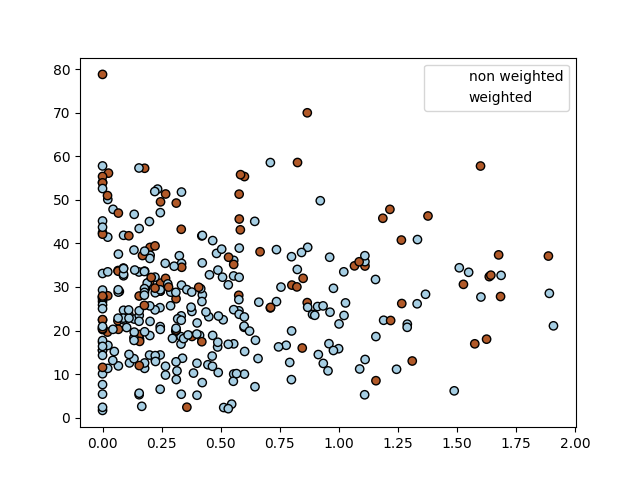

In [71]:
from sklearn import svm
from sklearn.datasets import make_blobs

eccOFD = np.vstack([OFDs, eccs]).T

time_idcs = eccOFD[:, 0] < 2
ecc_idcs = eccOFD[:, 1] < 100
valid = time_idcs * ecc_idcs

eccOFD = eccOFD[valid,:]
responses = responses_original[valid]
# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(eccOFD, responses)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(eccOFD, responses)

plt.figure()
# plot the samples
plt.scatter(eccOFD[:, 0], eccOFD[:, 1], c=responses, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors="k", levels=[0], alpha=0.5, linestyles=["-"])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors="r", levels=[0], alpha=0.5, linestyles=["-"])

plt.legend(
    [a.collections[0], b.collections[0]],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

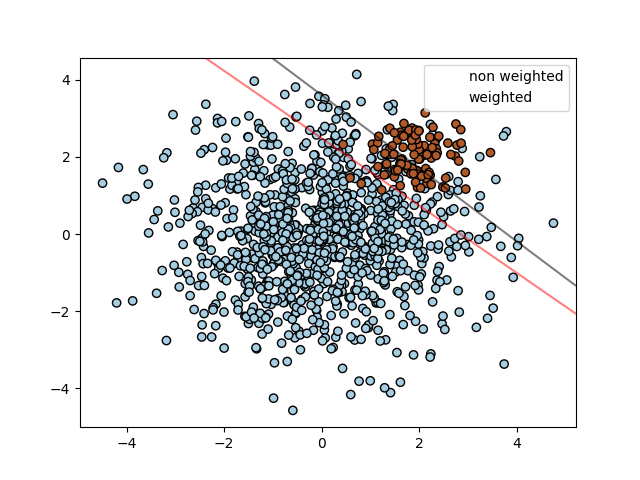

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors="k", levels=[0], alpha=0.5, linestyles=["-"])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors="r", levels=[0], alpha=0.5, linestyles=["-"])

plt.legend(
    [a.collections[0], b.collections[0]],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()